In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import packages
import tensorflow as tf
import numpy as np
import csv
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [3]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [4]:
# Load data
data = [] # list of lists of the form [smiles, sequence, pKd]

with open('/content/drive/MyDrive/dta_df.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader) # skip header
  for row in reader:
      triplet = []
      triplet.append(row[0])
      triplet.append(row[1])
      triplet.append(float(row[2]))
      data.append(triplet)

len(data)




23785

In [5]:
data[0] 

['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSE

In [6]:
smiles = []
proteins = []
labels = []
random.shuffle(data)

for triplet in range(len(data)):
  smiles.append(data[triplet][0])
  proteins.append(data[triplet][1])
  labels.append(data[triplet][2])

In [7]:
print(smiles[0])
print(proteins[0])
print(labels[0])
# looks good!

CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=C5C=NNC5=CC=C4)N6CCOCC6
MSTFRQEDVEDHYEMGEELGSGQFAIVRKCRQKGTGKEYAAKFIKKRRLSSSRRGVSREEIEREVNILREIRHPNIITLHDIFENKTDVVLILELVSGGELFDFLAEKESLTEDEATQFLKQILDGVHYLHSKRIAHFDLKPENIMLLDKNVPNPRIKLIDFGIAHKIEAGNEFKNIFGTPEFVAPEIVNYEPLGLEADMWSIGVITYILLSGASPFLGETKQETLTNISAVNYDFDEEYFSNTSELAKDFIRRLLVKDPKRRMTIAQSLEHSWIKAIRRRNVRGEDSGRKPERRRLKTTRLKEYTIKSHSSLPPNNSYADFERFSKVLEEAAAAEEGLRELQRSRRLCHEDVEALAAIYEEKEAWYREESDSLGQDLRRLRQELLKTEALKRQAQEEAKGALLGTSGLKRRFSRLENRYEALAKQVASEMRFVQDLVRALEQEKLQGVECGLR
5.7447274948966935


In [17]:
smiles = []
proteins = []
labels = []
random.shuffle(data)

for triplet in range(len(data)):
  smiles.append(data[triplet][0])
  proteins.append(data[triplet][1])
  labels.append(data[triplet][2])


     RDKit          2D

 33 40  0  0  0  0  0  0  0  0999 V2000
    3.4199   -7.0384    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5382   -5.8249    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9841   -5.4258    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0514   -3.9273    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6595   -3.1247    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2490   -4.5040    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2135   -2.7256    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2135   -2.7256    0

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


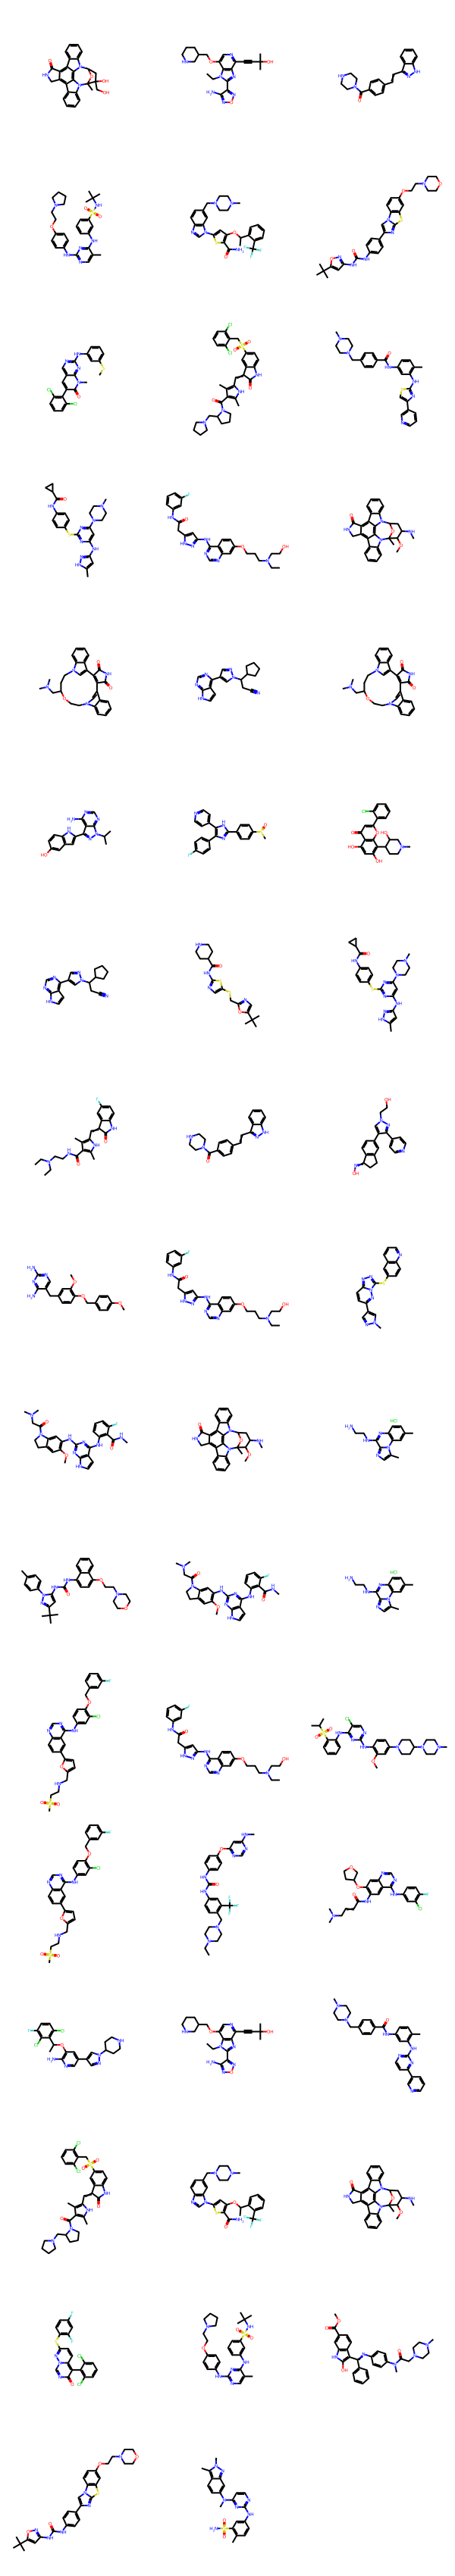

In [18]:
#smiles to sdk
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import PIL as Image

sdk_smiles = []
def smiles_to_sdk(smiles):
    mol = Chem.MolFromSmiles(smiles)
    sdk = Chem.MolToMolBlock(mol)
    return sdk

sdk_smiles = [smiles_to_sdk(s) for s in smiles]

print(sdk_smiles[0])

#Visualization
# Convert sdk_smiles to RDKit Molecule objects
molecules = [Chem.MolFromMolBlock(sdk) for sdk in sdk_smiles]

# Draw the molecules
img = Draw.MolsToGridImage(molecules, molsPerRow=3)

display(img)

In [8]:
split = int(0.9 * len(smiles))
train_smiles = smiles[:split]
test_smiles = smiles[split:]
train_proteins = proteins[:split]
test_proteins = proteins[split:]
train_labels = labels[:split]
test_labels = labels[split:]

In [9]:
import itertools

def generate_ngrams(sequence, n):
    ngrams = []
    for i in range(len(sequence) - n + 1):
        ngrams.append(sequence[i:i+n])
    return ngrams

# Iterate through all sequences of smiles and proteins
all_smiles = train_smiles + test_smiles  # Assuming you have a list of all smiles sequences
all_proteins = train_proteins + test_proteins  # Assuming you have a list of all protein sequences

smiles_subset = all_smiles[:30]
proteins_subset = all_proteins[:30]

n = 3  # Set the desired n-gram length

smiles_ngrams = []
proteins_ngrams = []

for smiles, proteins in zip(smiles_subset, proteins_subset):
    smiles_ngrams.extend(generate_ngrams(smiles, n))
    proteins_ngrams.extend(generate_ngrams(proteins, n))

# Print the generated n-grams
for i in range(len(smiles_ngrams)):
    print(f"Smiles n-gram {i+1}: {smiles_ngrams[i]}")
    print(f"Proteins n-gram {i+1}: {proteins_ngrams[i]}")
    print()


Streaming output truncated to the last 5000 lines.
Proteins n-gram 164: IAH

Smiles n-gram 165: C4=
Proteins n-gram 165: AHK

Smiles n-gram 166: 4=N
Proteins n-gram 166: HKI

Smiles n-gram 167: =NC
Proteins n-gram 167: KIE

Smiles n-gram 168: NC=
Proteins n-gram 168: IEA

Smiles n-gram 169: C=C
Proteins n-gram 169: EAG

Smiles n-gram 170: =C3
Proteins n-gram 170: AGN

Smiles n-gram 171: C3)
Proteins n-gram 171: GNE

Smiles n-gram 172: 3)O
Proteins n-gram 172: NEF

Smiles n-gram 173: )OC
Proteins n-gram 173: EFK

Smiles n-gram 174: OC)
Proteins n-gram 174: FKN

Smiles n-gram 175: C)O
Proteins n-gram 175: KNI

Smiles n-gram 176: )OC
Proteins n-gram 176: NIF

Smiles n-gram 177: OC)
Proteins n-gram 177: IFG

Smiles n-gram 178: C)O
Proteins n-gram 178: FGT

Smiles n-gram 179: )OC
Proteins n-gram 179: GTP

Smiles n-gram 180: CC1
Proteins n-gram 180: TPE

Smiles n-gram 181: C1=
Proteins n-gram 181: PEF

Smiles n-gram 182: 1=C
Proteins n-gram 182: EFV

Smiles n-gram 183: =C(
Proteins n-gram 18

In [10]:
from collections import defaultdict

def calculate_bigram_probability(ngrams):
    # Count the occurrences of each bigram
    bigram_counts = defaultdict(int)
    unigram_counts = defaultdict(int)

    for ngram in ngrams:
        for i in range(len(ngram) - 1):
            unigram = ngram[i]
            bigram = tuple(ngram[i:i+2])
            unigram_counts[unigram] += 1
            bigram_counts[bigram] += 1

    # Calculate the bigram probabilities
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        unigram = bigram[0]
        probability = count / unigram_counts[unigram]
        bigram_probabilities[bigram] = probability

    return bigram_probabilities

# Retrieve the first 30 sequences of smiles and proteins
smiles_subset = all_smiles[:30]
proteins_subset = all_proteins[:30]

n = 2  # Set the desired n-gram length (bigram)

smiles_bigram_probabilities = calculate_bigram_probability(smiles_ngrams)
proteins_bigram_probabilities = calculate_bigram_probability(proteins_ngrams)

# Print the bigram probabilities for smiles
print("Smiles Bigram Probabilities:")
for bigram, probability in smiles_bigram_probabilities.items():
    print(f"{bigram}: {probability}")

print()



Smiles Bigram Probabilities:
('C', 'S'): 0.00583941605839416
('S', '('): 0.43478260869565216
('(', '='): 0.41916167664670656
('=', 'O'): 0.10231023102310231
('O', ')'): 0.4503311258278146
(')', '('): 0.036923076923076927
(')', 'N'): 0.25846153846153846
('N', '1'): 0.09454545454545454
('1', 'C'): 0.31666666666666665
('C', 'C'): 0.18905109489051095
('C', 'N'): 0.041605839416058395
('N', '('): 0.10181818181818182
('(', 'C'): 0.49700598802395207
('C', '1'): 0.05766423357664233
('1', ')'): 0.35
(')', 'C'): 0.4246153846153846
('C', '2'): 0.07226277372262774
('2', '='): 0.3898305084745763
('=', 'C'): 0.759075907590759
('C', '3'): 0.07591240875912408
('3', '='): 0.43333333333333335
('C', '('): 0.20583941605839415
('(', 'S'): 0.011976047904191617
('S', '2'): 0.17391304347826086
('2', ')'): 0.2711864406779661
('=', 'N'): 0.13861386138613863
('N', 'C'): 0.43636363636363634
('N', '3'): 0.05090909090909091
('3', ')'): 0.38333333333333336
('C', '4'): 0.06350364963503649
('4', '='): 0.494382022471910

In [11]:
# Print the bigram probabilities for proteins
print("Proteins Bigram Probabilities:")
for bigram, probability in proteins_bigram_probabilities.items():
    print(f"{bigram}: {probability}")


Proteins Bigram Probabilities:
('M', 'S'): 0.07729468599033816
('S', 'T'): 0.044753553069247054
('T', 'F'): 0.03139240506329114
('F', 'R'): 0.05570652173913043
('R', 'Q'): 0.05748031496062992
('Q', 'E'): 0.09657320872274143
('E', 'D'): 0.06060606060606061
('D', 'V'): 0.05088400172488142
('V', 'E'): 0.06428284451586982
('D', 'H'): 0.02414833980163864
('H', 'Y'): 0.04152249134948097
('Y', 'E'): 0.0625
('E', 'M'): 0.030874785591766724
('M', 'G'): 0.03768115942028986
('G', 'E'): 0.08505917159763314
('E', 'E'): 0.11435105774728416
('E', 'L'): 0.0989136649514008
('L', 'G'): 0.061519903498190594
('G', 'S'): 0.09578402366863906
('S', 'G'): 0.07438766253401875
('G', 'Q'): 0.03328402366863906
('Q', 'F'): 0.017653167185877467
('F', 'A'): 0.042119565217391304
('A', 'I'): 0.057848052448900886
('I', 'V'): 0.060089686098654706
('V', 'R'): 0.05785456006428284
('R', 'K'): 0.06456692913385827
('K', 'C'): 0.011503067484662576
('C', 'R'): 0.06418485237483953
('Q', 'K'): 0.06438213914849429
('K', 'G'): 0.0

In [12]:
from collections import defaultdict

def calculate_trigram_probability(ngrams):
    # Count the occurrences of each trigram
    trigram_counts = defaultdict(int)
    bigram_counts = defaultdict(int)

    for ngram in ngrams:
        for i in range(len(ngram) - 2):
            bigram = tuple(ngram[i:i+2])
            trigram = tuple(ngram[i:i+3])
            bigram_counts[bigram] += 1
            trigram_counts[trigram] += 1

    # Calculate the trigram probabilities
    trigram_probabilities = {}
    for trigram, count in trigram_counts.items():
        bigram = trigram[:2]
        probability = count / bigram_counts[bigram]
        trigram_probabilities[trigram] = probability

    return trigram_probabilities

# Retrieve the first 30 sequences of smiles and proteins
smiles_subset = all_smiles[:30]
proteins_subset = all_proteins[:30]

n = 3  # Set the desired n-gram length (trigram)

smiles_trigram_probabilities = calculate_trigram_probability(smiles_ngrams)
proteins_trigram_probabilities = calculate_trigram_probability(proteins_ngrams)

# Print the trigram probabilities for smiles
print("Smiles Trigram Probabilities:")
for trigram, probability in smiles_trigram_probabilities.items():
    print(f"{trigram}: {probability}")

print()




Smiles Trigram Probabilities:
('C', 'S', '('): 0.4
('S', '(', '='): 1.0
('(', '=', 'O'): 0.35714285714285715
('=', 'O', ')'): 0.9666666666666667
('O', ')', '('): 0.14705882352941177
(')', '(', '='): 0.8333333333333334
('O', ')', 'N'): 0.4117647058823529
(')', 'N', '1'): 0.075
('N', '1', 'C'): 0.6923076923076923
('1', 'C', 'C'): 0.3157894736842105
('C', 'C', 'N'): 0.11764705882352941
('C', 'N', '('): 0.3870967741935484
('N', '(', 'C'): 0.9285714285714286
('(', 'C', 'C'): 0.14457831325301204
('C', 'C', '1'): 0.058823529411764705
('C', '1', ')'): 0.2857142857142857
('1', ')', 'C'): 0.7142857142857143
(')', 'C', 'C'): 0.1323529411764706
('C', 'C', '2'): 0.03676470588235294
('C', '2', '='): 0.46938775510204084
('2', '=', 'C'): 0.6521739130434783
('=', 'C', 'C'): 0.25217391304347825
('C', 'C', '3'): 0.051470588235294115
('C', '3', '='): 0.5
('3', '=', 'C'): 0.9230769230769231
('=', 'C', '('): 0.30434782608695654
('C', '(', 'S'): 0.014184397163120567
('(', 'S', '2'): 1.0
('S', '2', ')'): 1.0


In [13]:
# Print the trigram probabilities for proteins
print("Proteins Trigram Probabilities:")
for trigram, probability in proteins_trigram_probabilities.items():
    print(f"{trigram}: {probability}")

Streaming output truncated to the last 5000 lines.
('Y', 'D', 'I'): 0.10714285714285714
('D', 'I', 'I'): 0.05102040816326531
('I', 'I', 'E'): 0.10909090909090909
('I', 'E', 'V'): 0.06060606060606061
('E', 'V', 'L'): 0.15384615384615385
('V', 'L', 'G'): 0.1
('L', 'G', 'K'): 0.047244094488188976
('G', 'T', 'F'): 0.06493506493506493
('T', 'F', 'G'): 0.12903225806451613
('F', 'G', 'E'): 0.11428571428571428
('E', 'V', 'A'): 0.038461538461538464
('V', 'A', 'K'): 0.02564102564102564
('K', 'G', 'W'): 0.015151515151515152
('G', 'W', 'R'): 0.16666666666666666
('W', 'R', 'R'): 0.26666666666666666
('R', 'R', 'S'): 0.06140350877192982
('R', 'S', 'T'): 0.033707865168539325
('S', 'T', 'G'): 0.10810810810810811
('T', 'G', 'E'): 0.078125
('G', 'E', 'M'): 0.034782608695652174
('E', 'M', 'V'): 0.07407407407407407
('M', 'V', 'A'): 0.08333333333333333
('V', 'A', 'I'): 0.10256410256410256
('A', 'I', 'K'): 0.16
('I', 'L', 'K'): 0.031746031746031744
('K', 'N', 'D'): 0.01694915254237288
('N', 'D', 'A'): 0.0869

In [15]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 45.2 MB/s eta 0:00:00


[05:32:04] SMILES Parse Error: syntax error while parsing: (
[05:32:04] SMILES Parse Error: Failed parsing SMILES '(' for input: '('


ArgumentError: ignored